In [1]:
import random
import numpy as np
from math import sqrt
from scipy.stats import t,norm
import matplotlib.pyplot as plt

**Step - 1** :

- Alternate hypothesis (Bold Claim) $H_1$

- Null Hypothesis (Status Quo) $H_0$

**Step 2** :
- Collection sample of Sample Size n
- Compute Sample Mean : $ \bar x $ = ?

**Step 3**:
 Compute t- Statistic (as population Standard Deviation is not Given):
 $$ t_{n-1,\frac{\alpha}{2}} = \frac {\bar x - \mu_{\bar x}}{\frac{s}{\sqrt n}} $$

**Step 4**:
Decide $\alpha$ or significance level and $degree \ of \ freedom $

**Step 5** :
5.1 Apply Decision Rule:
- For T-test:
  - Two Tail t-test:
  $$|t| \ > \ t_{n-1,\frac{\alpha}{2}} \Rightarrow Acceept \ H_1 \ or \ Reject \ H_0$$
  - Right Tail t-test:
  $$t \ > \ t_{n-1,\frac{\alpha}{2}} \Rightarrow Acceept \ H_1 \ or \ Reject \ H_0$$
  - left Tail t-test:
  $$t \ < \ t_{n-1,\frac{\alpha}{2}} \Rightarrow Acceept \ H_1 \ or \ Reject \ H_0$$

5.2 Compute p-Value $P(Test \ Statistics H_0)$
- For Two-Tailed Test:
  $$p \ value = 2 * (1- cdf(Test \ Statistics))$$
- For One-Tailed Test:
  $$p \ value = (1- cdf(Test \ Statistics))$$
  
- Now,
$$ if(p \ value \ < \ \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $$


In [2]:
# for Calculating t-score
def t_Score(sample_size,sample_mean,sample_stddev,pop_mean):
    return ((sample_mean -pop_mean) / (sample_stddev/(sqrt(sample_size))))

# Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? 
~(Given that the population std is 50)~

**Step 1** :
$$H_1 = Each \ packet \  doesnot \ contain \ 500 \ gm $$
$$H_0 = Each \ Packet \ contain \ 500 \ gm $$

In [10]:
#Step 2:
sample=[456,430,340,510,490,505,418,439,520,498]
n=len(sample)  # Sample Size
print(n)
print(sample) 

sample_mean_x=np.mean(sample)
print(sample_mean_x)
sample_stddeviation_s=np.std(sample)
print(sample_stddeviation_s)

population_mean=500  # Given in the Question

10
[456, 430, 340, 510, 490, 505, 418, 439, 520, 498]
460.6
52.9021738683771


In [19]:
# Step 3:
# T score or T calculated
T_score=t_Score(n,sample_mean_x,sample_stddeviation_s,population_mean)
T_score

-2.3551724002992525

In [6]:
# Step 4:
# T Critical or T-Tabulated
confidence_level=0.95
deg_of_freedom=n-1
alpha=1-confidence_level
t_critical=t.ppf(1-alpha/2,deg_of_freedom)
t_critical

2.2621571627409915

Text(460.6, 0.0007, 'X_bar')

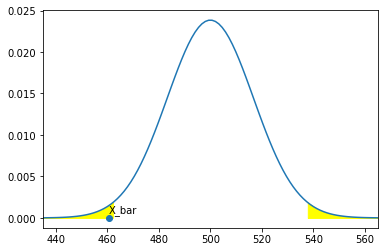

In [33]:
#plotting the sample distribution with rejection region
x_min = 435
x_max = 565

#defining sample mean and sample std
mean = population_mean
std = sample_stddeviation_s/ n**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,100)
y = norm.pdf(x, mean ,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = population_mean + (-t_critical*std)
t_critical_right = population_mean + (t_critical*std)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='yellow')

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean,std)
plt.fill_between(x2,y2,color='yellow')

#plotting the sample mean
plt.scatter(sample_mean_x,0)
plt.annotate('X_bar',(sample_mean_x,0.0007))

In [34]:
# Step 5.1
#conclusion using t-test
if(np.abs(T_score)>t_critical):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


In [35]:
# Step 5.2
#Conclusion using p-test (two- Tail):
p_value = 2 * (1.0 - norm.cdf(np.abs(T_score)))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failes to reject null hypothesis")

P_value: 0.01851411386246049
Reject null hypothesis


# Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? 
~(Given that the population std is 0.5)~

**Step 1** :
$$ H_1 \ = \ All \ User \ rating \ are \ above \ 4 $$
$$ H_0 \ = \ Userss \ rating \ are \ not \ above \ 4 $$

In [3]:
#Step 2:
sample=[4,3,5,4,5,3,5,5,4,2,4,5,5,4,4,5,4,5,4,5]
n=len(sample)  # Sample Size
print(n)
print(sample) 

sample_mean_x=np.mean(sample)
print(sample_mean_x)
sample_stddeviation_s=np.std(sample)
print(sample_stddeviation_s)

population_mean=4  # Given in the Question

20
[4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]
4.25
0.82915619758885


In [4]:
# Step 3:
# T score or T calculated
T_score=t_Score(n,sample_mean_x,sample_stddeviation_s,population_mean)
T_score

1.3483997249264843

In [5]:
# Step 4:
# T Critical or T-Tabulated 
# Right Tail Test
confidence_level=0.95
deg_of_freedom=n-1
alpha=1-confidence_level
t_critical=t.ppf(1-alpha,deg_of_freedom)
t_critical

1.729132811521367

Text(4.25, 0.0007, 'X_bar')

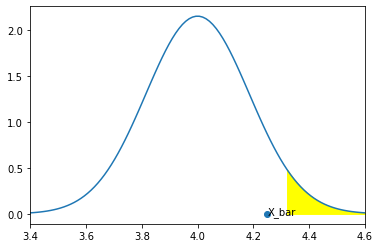

In [7]:
#plotting the sample distribution with rejection region
x_min = 3.4
x_max = 4.6

#defining sample mean and sample std
mean = population_mean
std = sample_stddeviation_s/ n**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,100)
y = norm.pdf(x, mean ,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = population_mean + (-t_critical*std)
t_critical_right = population_mean + (t_critical*std)

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean,std)
plt.fill_between(x2,y2,color='yellow')

#plotting the sample mean
plt.scatter(sample_mean_x,0)
plt.annotate('X_bar',(sample_mean_x,0.0007))

In [47]:
# Step 5.1
#conclusion using t-test
if(np.abs(T_score)>t_critical):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [48]:
# Step 5.2
#Conclusion using p-test (one - tail):
p_value = (1.0 - norm.cdf(np.abs(T_score)))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failes to reject null hypothesis")

P_value: 0.08876492620607679
Failes to reject null hypothesis



# Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? 
~(Given that the population std is 1)~

**Step 1** :
$$ H_1 \ = \ Average \ Mileage \ is \ atleast \ 15km/litre $$
$$ H_0 \ = \ Average \ Mileage \ is \ not \ 15km/litre $$

In [8]:
#Step 2:
sample=[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] 
n=len(sample)  # Sample Size
print(n)
print(sample) 

sample_mean_x=np.mean(sample)
print(sample_mean_x)
sample_stddeviation_s=np.std(sample)
print(sample_stddeviation_s)

population_mean=15  # Given in the Question

20
[14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38]
15.099
0.9994043225842081


In [10]:
# Step 3:
# T score or T calculated
T_score=t_Score(n,sample_mean_x,sample_stddeviation_s,population_mean)
T_score

0.4430053478257341

In [11]:
# Step 4:
# T Critical or T-Tabulated 
# Right Tail Test
confidence_level=0.95
deg_of_freedom=n-1
alpha=1-confidence_level
t_critical=t.ppf(1-alpha,deg_of_freedom)
t_critical

1.729132811521367

Text(15.099, 0.0007, 'X_bar')

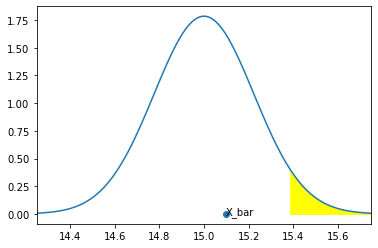

In [12]:
#plotting the sample distribution with rejection region
x_min = 14.25
x_max = 15.75

#defining sample mean and sample std
mean = population_mean
std = sample_stddeviation_s/ n**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,100)
y = norm.pdf(x, mean ,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = population_mean + (-t_critical*std)
t_critical_right = population_mean + (t_critical*std)

#Shading the right rejection region
x2 = np.linspace(t_critical_right,x_max,100)
y2 = norm.pdf(x2,mean,std)
plt.fill_between(x2,y2,color='yellow')

#plotting the sample mean
plt.scatter(sample_mean_x,0)
plt.annotate('X_bar',(sample_mean_x,0.0007))

In [13]:
# Step 5.1
#conclusion using t-test
if(np.abs(T_score)>t_critical):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [14]:
# Step 5.2
#Conclusion using p-test (one - test):
p_value = (1.0 - norm.cdf(np.abs(T_score)))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failes to reject null hypothesis")

P_value: 0.3288809332844478
Failes to reject null hypothesis


# Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? 
~(Based on past data you know that the std is 10 ms)~

**Step 1** :
$$ H_1 \ = \ Takes \ less \ than \ 100ms \ for \ prediction $$
$$ H_0 \ = \ Takes \ more \ than \ 100ms \ for \ prediction  $$

In [23]:
#Step 2:
sample=[110,99,87,120,89,98,95,97,119,102,105,109,100,93,82,116,107,102,112,91]
n=len(sample)  # Sample Size
print(n)
print(sample) 

sample_mean_x=np.mean(sample)
print(sample_mean_x)
sample_stddeviation_s=np.std(sample)
print(sample_stddeviation_s)

population_mean=100  # Given in the Question

20
[110, 99, 87, 120, 89, 98, 95, 97, 119, 102, 105, 109, 100, 93, 82, 116, 107, 102, 112, 91]
101.65
10.374367450596688


In [24]:
# Step 3:
# T score or T calculated
T_score=t_Score(n,sample_mean_x,sample_stddeviation_s,population_mean)
T_score

0.7112746257435602

In [27]:
# Step 4:
# T Critical or T-Tabulated 
# Right Tail Test
confidence_level=0.99
deg_of_freedom=n-1
alpha=1-confidence_level
t_critical=t.ppf(1-alpha,deg_of_freedom)
t_critical

2.539483190622288

Text(101.65, 0.0007, 'X_bar')

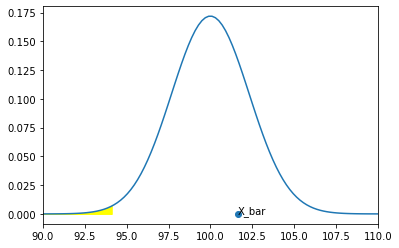

In [30]:
#plotting the sample distribution with rejection region
x_min = 90
x_max = 110

#defining sample mean and sample std
mean = population_mean
std = sample_stddeviation_s/ n**0.5

#plotting the graph and setting limits
x = np.linspace(x_min,x_max,100)
y = norm.pdf(x, mean ,std)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Computing the left and right critical values
t_critical_left = population_mean + (-t_critical*std)

#Shading the left rejection region
x1 = np.linspace(x_min,t_critical_left,100)
y1 = norm.pdf(x1,mean,std)
plt.fill_between(x1,y1,color='yellow')


#plotting the sample mean
plt.scatter(sample_mean_x,0)
plt.annotate('X_bar',(sample_mean_x,0.0007))

In [39]:
# Step 5.1
#conclusion using t-test
if(T_score<-t_critical):  # Since it is a left tail testing
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Failed to reject null hypothesis


In [38]:
# Step 5.2
#Conclusion using p-test (one - test):
p_value = (1.0 - norm.cdf(T_score))
print("P_value:",p_value)
if (p_value<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

P_value: 0.23845703615168035
Failed to reject null hypothesis
